In [1]:
import classes as cl
import network
import travel_time as travel
import numpy as np
import plot
import import_ipynb
import heuristic as heu
import main1
import sampling 
import networkx as nx
import sorting
import localsearch as search

importing Jupyter notebook from main1.ipynb
Total Population:  13436


In [2]:
grid, V_stops, V_blocks, V_existing, V_possible, pop, all_facilities, total_pop, travel2 = main1.network_details()

n, m, e, p, p_min, p_max, d_b, d_s = main1.parameters()

In [3]:
G = sampling.build_graph(grid, V_blocks, V_stops, V_existing, V_possible)
dict = {}
for node in grid.keys():
    dict[node] = node
#nx.draw(G, dict)

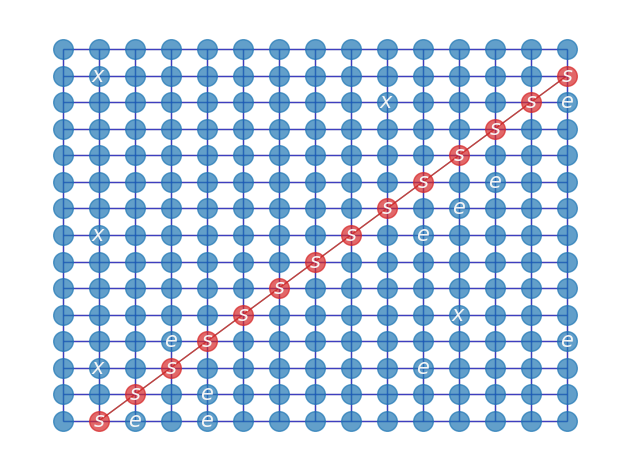

In [4]:
alpha_node = 0.7
alpha_edge = 0.5
node_size = 200
cent = []
plot.plot_graph(G, V_stops, V_possible, V_existing, all_facilities, cent, node_size, alpha_node, alpha_edge)

$Step ?? :$ Choosing Seed Points.

 To choose $p$ district centers from the set of possible locations, we use a version of the $k$-means++ algorithm [David Arthur, Sergei Vassilvitskii, k-means++: The Advantages of Careful Seeding].

The $k$-means++ algorithm aims at spreading out the initial medians as far as possible.

$1a.$ Choose an initial center $c_1$ uniformly at random from $X$.

$1b.$ Choose the next center $c_i$, selecting $c_i = x^{\prime} \in X$ with probability $\dfrac{D(x^{\prime})^2}{\sum\limits_{x \in X} D(x)^2}$.

$1c.$ Repeat Step $1b$ until we have chosen a total of $k$ centers.

Note: We can choose them completely random as in the Ricca's paper.

In [5]:
#p = 5
#epsilon =0.1

#centers = sampling.choose_centers_kmeans2(grid, V_existing, V_possible, p)
#centers1 = sampling.choose_centers_kmeans_3(grid, V_existing, V_possible, p)

    Initialize set of clusters: $C = \{ \}$.  (Dictionary. key: cluster name, value: list of vertices)
    Determine the set of the connected components in $G$, $\mathcal{G}=\{G_1, G_2, ..., G_k\}$. 
    Repeat until $\mathcal{G} = \emptyset$.

        For each component $G_i$, do:

            If there is only one facility in the vertex set:
                Put $G_i$ to $C$ and remove it from $G$.

            else:   
                Choose a random facility $u$ from $G_i$. 
                Calculate lengths of the shortest paths from $u$ to all other facilities. 
                Pick the minimum length. 
                Let $P$ be one of the shortest paths corresponding to the minimum length. 
                Choose an edge from $P$ uniformly at random and remove the edge.
                Update $G$.
        
        Update $\mathcal{G}$.

In [6]:
"""neighborhood = search.exact_neighborhood(G, C)

for neighbor in neighborhood.values():
    print(neighbor)"""

'neighborhood = search.exact_neighborhood(G, C)\n\nfor neighbor in neighborhood.values():\n    print(neighbor)'

    Notes: 

       (1) Each phc location is a part of a block. They should also be a block node with a population.

       (2) Stops might have the same sitution. They currently have zero population now. But they affect
           the access objective function since they are also clustered.
           
       (3) Closed phcs should also be clustered. Otherwise, they make clusters disconnected as in the picture below.
    
    Edit: 

        Assign a population to each nonblock node and add these nodes to the set of blocks. Correct related parts in all the codes.
    
    Note:

        PHCs already have a population! Edit all the code accordingly.

In [7]:
#partitioned_tree, spanning_tree, solution, popul = search.generate_initial_partition(G, grid, centers1)
#origin, boundaries, neighborhood = search.exact_neighborhood(G, solution)
#plot.plot_graph_clusters_boundaries(spanning_tree, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution, boundaries, origin)

In [8]:
#plot.plot_graph_clusters_boundaries(partitioned_tree, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution, boundaries, origin)

In [9]:
#solution1, populations, partitioned_t, spanning = search.generate_initial_solution1(G, grid, centers1)
#origin1, boundaries1, neighborhood1 = search.exact_neighborhood(G, solution1)
#plot.plot_graph_clusters_boundaries(spanning, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution1, boundaries1, origin1)
#plot.plot_graph_clusters_boundaries(partitioned_t, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution, boundaries1, origin1)
#plot.plot_graph_clusters(partitioned_t, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution, boundaries1, origin1)

In [10]:
#plot.plot_graph_clusters(G, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, solution, boundaries1, origin1)

In [11]:
k = 5

seeds = sampling.random_centers(V_existing, V_possible, k)
partitioned_tree, spanning_tree, solution, popul = search.generate_initial_partition(G, grid, seeds)
origin, boundaries, neighborhood = search.exact_neighborhood(G, solution)

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


clusters: {(1, 13): [(6, 12), (4, 12), (5, 13), (3, 13), (5, 10), (9, 14), (0, 14), (1, 9), (0, 11), (2, 14), (1, 12), (6, 11), (6, 14), (7, 13), (4, 14), (3, 12), (5, 9), (5, 12), (8, 14), (0, 10), (1, 11), (0, 13), (1, 14), (2, 13), (6, 13), (6, 10), (3, 14), (5, 11), (4, 13), (5, 14), (0, 9), (0, 12), (8, 13), (1, 13), (2, 12), (1, 10), (7, 14)], (10, 2): [(10, 2), (9, 2), (9, 3), (10, 3)], (14, 3): [(13, 4), (14, 4), (14, 6), (13, 3), (14, 3), (12, 5), (14, 2), (13, 5), (14, 5)], (1, 7): [(0, 7), (1, 5), (0, 6), (1, 7), (2, 6), (0, 5), (1, 6), (0, 8), (2, 5)], (4, 0): [(4, 0), (5, 0), (6, 0)], (2, 0): [(0, 1), (2, 1), (0, 0), (1, 1), (2, 0), (3, 0), (2, 2), (1, 0)], (1, 2): [(1, 2), (0, 2), (0, 3), (1, 3)], (3, 3): [(2, 4), (0, 4), (3, 4), (3, 1), (1, 4), (2, 3), (3, 3), (3, 2)], (11, 8): [(11, 7), (12, 7), (11, 6), (12, 6), (11, 8), (12, 8)], (4, 1): [(6, 2), (6, 1), (5, 1), (4, 2), (6, 3), (4, 1), (5, 2)], (14, 12): [(13, 8), (14, 8), (13, 7), (14, 7), (13, 10), (14, 10), (13, 9)

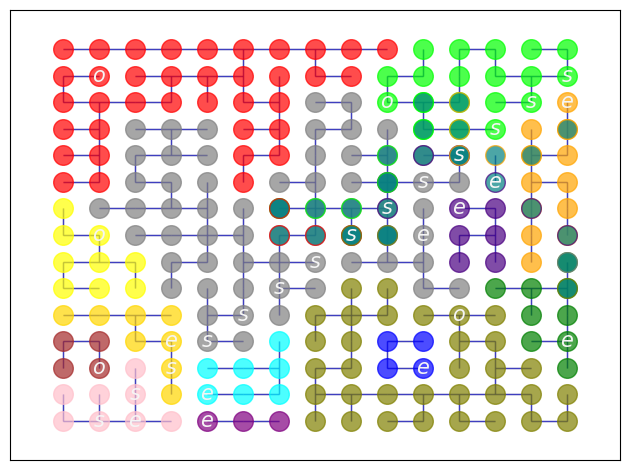

In [12]:
partitioned_tree_BFS, spanning_tree_BFS, solution_BFS, popul_BFS = search.generate_initial_partition_BFS(G, grid, seeds)
origin_BFS, boundaries_BFS, neighborhood_BFS = search.exact_neighborhood(G, solution)

plot.plot_graph_clusters_boundaries(partitioned_tree_BFS, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, solution_BFS, boundaries_BFS, origin_BFS)

1. Implement the compactness measure in the paper.
2. Seperate initial solution from the search algorithm.
3. Lower the complexity of initial solution as much as possible, and start the algorithm with different initial solution.
4. Explore the parameter space by keeping some parameters fixed and others changing.
5. Work on Markov chain ideas for neighboring.
6. Reinforcement learning for parameter tunning?
6. Force the new ideas first with descent because it does not have parameter. Then try to get better solution with old bachelor tunning parameters.

clusters: {(1, 2): [(1, 2), (0, 4), (0, 3), (1, 4), (0, 2), (1, 3)], (11, 8): [(12, 7), (10, 8), (13, 7), (11, 9), (10, 9), (11, 8), (12, 8)], (9, 12): [(6, 12), (4, 12), (5, 13), (3, 13), (5, 10), (8, 9), (9, 14), (8, 12), (9, 11), (11, 14), (6, 11), (7, 10), (6, 14), (7, 13), (4, 14), (3, 12), (4, 11), (5, 12), (8, 11), (8, 14), (9, 13), (10, 14), (7, 9), (6, 13), (7, 12), (6, 10), (3, 11), (4, 10), (3, 14), (5, 11), (4, 13), (5, 14), (9, 12), (8, 10), (10, 13), (8, 13), (7, 11), (6, 9), (7, 14)], (14, 12): [(13, 14), (14, 14), (11, 13), (12, 13), (13, 13), (14, 13), (12, 12), (13, 12), (14, 12), (12, 11), (13, 11), (12, 14)], (2, 0): [(0, 1), (2, 1), (0, 0), (1, 1), (2, 0), (1, 0)], (10, 7): [(11, 7), (10, 7), (11, 6), (12, 6), (13, 6)], (10, 2): [(11, 1), (11, 0), (10, 1), (11, 2), (10, 0), (10, 2)], (3, 3): [(4, 4), (5, 5), (3, 4), (4, 3), (5, 4), (7, 3), (2, 3), (4, 5), (3, 3), (2, 2), (5, 3), (3, 2), (6, 3), (3, 5)], (4, 0): [(4, 0), (7, 0), (3, 0), (5, 0), (6, 0)], (14, 3): [(1

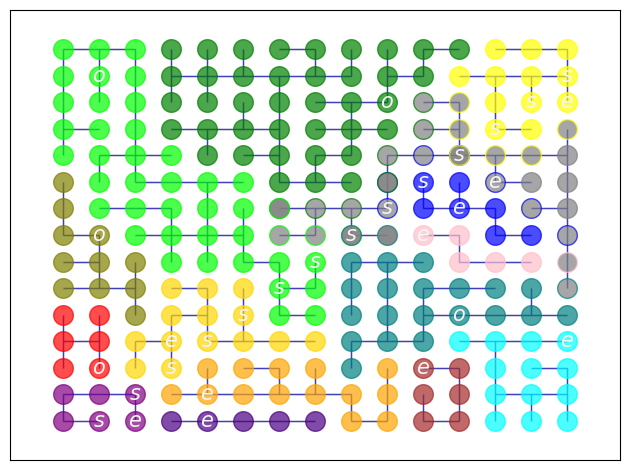

In [13]:
com = nx.connected_components(partitioned_tree)
sets = list(com)
clusterim = {}


for setim in sets:
    listim = list(setim)
    center = [value for value in seeds if value in listim]

    clusterim[center[0]] = listim

plot.plot_graph_clusters_boundaries(partitioned_tree, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, clusterim, boundaries, origin)

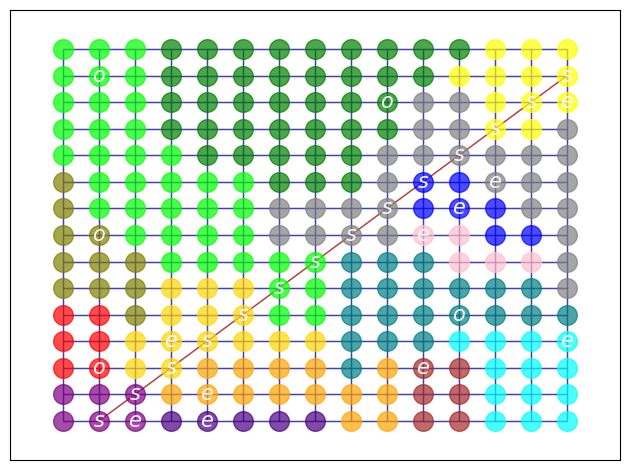

In [14]:
plot.plot_graph_clusters(G, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, clusterim)

iteration =  0
iteration =  500
iteration =  1000
iteration =  1500
iteration =  2000
iteration =  2500
iteration =  3000
iteration =  3500
iteration =  4000
iteration =  4500
iteration =  5000
iteration =  5500
iteration =  6000
iteration =  6500
iteration =  7000
iteration =  7500
iteration =  8000
iteration =  8500
iteration =  9000
iteration =  9500
initial pop energy of the best iteration:  0.7104197677880322
initial access energy of the best iteration:  9.63423967774421
final pop energy of the best iteration:  0.2547881313883099
final access energy of the best iteration:  5.579629629629631


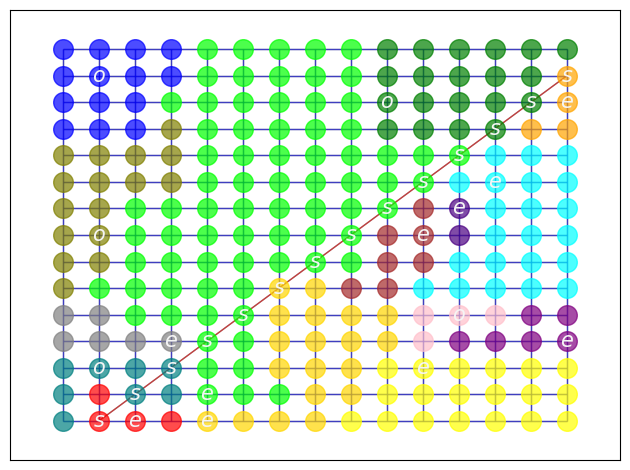

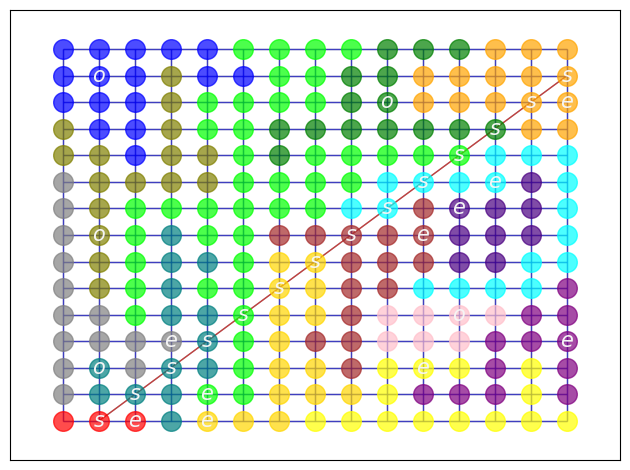

In [15]:
alpha = 0.3
num_iterations = 10000

results, initial, final_solution, energy_pop, energy_access, initial_pop, initial_access = search.multistart_descent_search(grid, G, travel2, seeds, alpha, num_iterations)

print("initial pop energy of the best iteration: ", initial_pop)
print("initial access energy of the best iteration: ", initial_access)
print("final pop energy of the best iteration: ", energy_pop)
print("final access energy of the best iteration: ", energy_access)

plot.plot_graph_clusters(G, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, initial)
plot.plot_graph_clusters(G, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, final_solution)

In [16]:
travel_radius_initial = {}
populations_initial = {}
travel_radius_final = {}
populations_final = {}

for center in initial.keys():
    travel_radius_initial[center] = max(travel2[node, center] for node in initial[center])
    populations_initial[center] = sum(grid[node].get_node_population() for node in initial[center])

for center in final_solution.keys():
    travel_radius_final[center] = max(travel2[node, center] for node in final_solution[center])
    populations_final[center] = sum(grid[node].get_node_population() for node in final_solution[center])

print("travel radius")
print("initial:", travel_radius_initial)
print("final:", travel_radius_final)
print("populations")
print("initial:", populations_initial)
print("final:", populations_final)


travel radius
initial: {(2, 0): 8, (1, 13): 15, (9, 12): 28, (10, 2): 30, (14, 3): 15, (11, 4): 10, (10, 7): 18, (4, 0): 38, (11, 8): 5, (12, 9): 30, (14, 12): 8, (3, 3): 20, (1, 7): 30, (4, 1): 63, (1, 2): 13}
final: {(2, 0): 8, (1, 13): 20, (9, 12): 25, (10, 2): 30, (14, 3): 30, (11, 4): 15, (10, 7): 33, (4, 0): 26, (11, 8): 15, (12, 9): 28, (14, 12): 23, (3, 3): 45, (1, 7): 40, (4, 1): 61, (1, 2): 33}
populations
initial: {(2, 0): 289, (1, 13): 786, (9, 12): 1167, (10, 2): 1177, (14, 3): 349, (11, 4): 236, (10, 7): 420, (4, 0): 1215, (11, 8): 89, (12, 9): 1265, (14, 12): 232, (3, 3): 378, (1, 7): 959, (4, 1): 4364, (1, 2): 510}
final: {(2, 0): 219, (1, 13): 910, (9, 12): 903, (10, 2): 866, (14, 3): 760, (11, 4): 410, (10, 7): 900, (4, 0): 958, (11, 8): 512, (12, 9): 979, (14, 12): 901, (3, 3): 897, (1, 7): 918, (4, 1): 2407, (1, 2): 896}


iteration =  0
iteration =  500
iteration =  1000
iteration =  1500
iteration =  2000
iteration =  2500
iteration =  3000
iteration =  3500
iteration =  4000
iteration =  4500
iteration =  5000
iteration =  5500
iteration =  6000
iteration =  6500
iteration =  7000
iteration =  7500
iteration =  8000
iteration =  8500
iteration =  9000
iteration =  9500
initial pop energy:  0.6814329661605636
initial access energy:  8.95238095238095
final pop energy of the best iteration:  0.5507393073335319
final access energy of the best iteration:  15.761124896608766


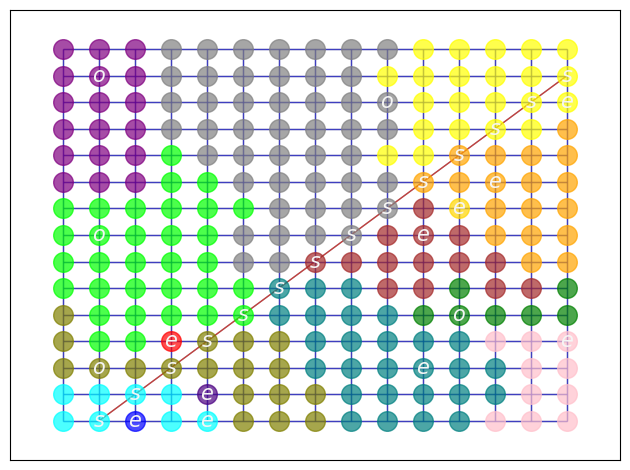

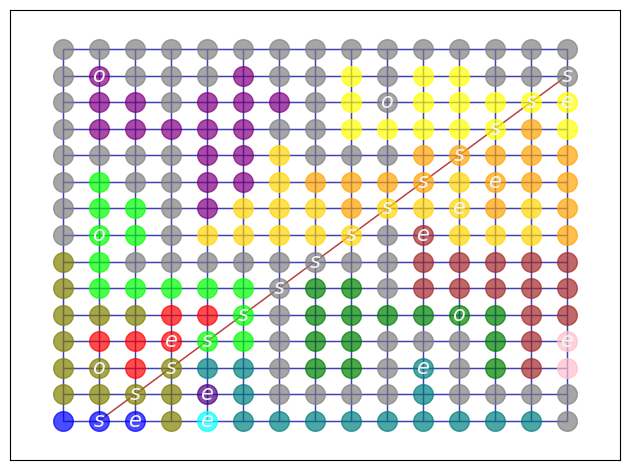

In [17]:
alpha = 0.1
num_iterations = 10000
granularity = 0.001
a = len(grid.keys())/2
b = 1
c = 1


initial_OLD, initial_pop_OLD, initial_energy_pop_OLD, initial_energy_access_OLD, best_solution_OLD, best_energy_pop_OLD, best_energy_access_OLD= search.old_bachelor(G, grid, seeds, travel2, num_iterations, granularity, a, b, c, alpha)

print("initial pop energy: ", initial_energy_pop_OLD)
print("initial access energy: ", initial_energy_access_OLD)
print("final pop energy of the best iteration: ", best_energy_pop_OLD)
print("final access energy of the best iteration: ", best_energy_access_OLD)

plot.plot_graph_clusters(G, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, initial_OLD)
plot.plot_graph_clusters(G, V_stops, V_possible, V_existing, all_facilities, seeds, node_size, best_solution_OLD)

In [18]:
travel_radius_initial_OLD = {}
populations_initial_OLD = {}
travel_radius_final_OLD = {}
populations_final_OLD = {}
  
for center in initial_OLD.keys():
    travel_radius_initial_OLD[center] = max(travel2[node, center] for node in initial_OLD[center])
    populations_initial_OLD[center] = sum(grid[node].get_node_population() for node in initial_OLD[center])

for center in best_solution_OLD.keys():
    travel_radius_final_OLD[center] = max(travel2[node, center] for node in best_solution_OLD[center])
    populations_final_OLD[center] = sum(grid[node].get_node_population() for node in best_solution_OLD[center])

print("travel radius")
print("initial:", travel_radius_initial_OLD)
print("final:", travel_radius_final_OLD)
print("populations")
print("initial:", populations_initial_OLD)
print("final:", populations_final_OLD)

travel radius
initial: {(3, 3): 0, (2, 0): 0, (11, 4): 20, (14, 12): 28, (1, 13): 25, (14, 3): 25, (10, 7): 25, (11, 8): 0, (4, 1): 0, (4, 0): 23, (12, 9): 25, (9, 12): 40, (1, 2): 38, (1, 7): 33, (10, 2): 33}
final: {(3, 3): 10, (2, 0): 8, (11, 4): 30, (14, 12): 33, (1, 13): 40, (14, 3): 5, (10, 7): 40, (11, 8): 33, (4, 1): 0, (4, 0): 0, (12, 9): 23, (9, 12): 83, (1, 2): 25, (1, 7): 38, (10, 2): 35}
populations
initial: {(3, 3): 76, (2, 0): 75, (11, 4): 473, (14, 12): 1291, (1, 13): 1060, (14, 3): 562, (10, 7): 798, (11, 8): 47, (4, 1): 47, (4, 0): 510, (12, 9): 997, (9, 12): 2741, (1, 2): 1129, (1, 7): 1905, (10, 2): 1725}
final: {(3, 3): 402, (2, 0): 219, (11, 4): 898, (14, 12): 960, (1, 13): 1018, (14, 3): 121, (10, 7): 892, (11, 8): 1070, (4, 1): 47, (4, 0): 61, (12, 9): 901, (9, 12): 4224, (1, 2): 842, (1, 7): 882, (10, 2): 899}


In [20]:
k = len(populations_initial_OLD.keys())
pop_avg = 0
radius_avg = 0

for pop in populations_initial_OLD.values():
    pop_avg = pop_avg + pop
pop_avg = pop_avg / k

for time in travel_radius_initial_OLD.values():
    radius_avg = radius_avg + time
radius_avg = radius_avg / k

print("pop average:", pop_avg)
print("radius average:", radius_avg)

pop average: 895.7333333333333
radius average: 21.0


In [19]:
#cluster = sampling.heu_cluster(G, grid, V_stops, V_blocks, all_facilities, centers1, travel2)
#plot.plot_graph_clusters_boundaries(G, V_stops, V_possible, V_existing, all_facilities, centers1, node_size, cluster, boundaries, origin)